预处理数据，针对数字型异常值进行前后填充，接近连续；
不符合连续的进行中位数或众数填充

In [85]:
# 数据预处理，去除异常点
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)
    del_idx = []
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
#     print('删除的索引值为：', index)
#     del_idx.append(index)
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
#     fig, ax = plt.subplots(1, 2, figsize=(10, 7))
#     sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
#     sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n, del_idx


def scale(features,scaler):

    scaler.fit(features)
    scaled_features=scaler.transform(features)
    return scaled_features,scaler

if __name__=='__main__':

    print('加载数据...')
    path = 'I:/old_cars/data/'
    Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')    
    print(['原始训练数据：',Train_data.shape])
    Test_data = pd.read_csv(path + 'used_car_testA_20200313.csv', sep=' ')
    print(['测试数据：',Test_data.shape])

    df = pd.concat([Train_data, Test_data], axis=0, ignore_index=True)
    print('合并后的数据：',df.shape)
    age = []
    for i in range(len(df)):
        age0 = df.creatDate[i] - df.regDate[i]
        age1 = round((age0//10000 + (age0/1000-age0//10000*10)/12)*365, 1)
        age.append(age1)
    df['used_time'] = age
    df.drop(['regDate', 'creatDate', 'name', 'SaleID', 'seller', 'offerType'], axis=1, inplace=True)
    print('删除无效特征后数据：', df.shape)
    numeric_features = ['power', 'kilometer', 'used_time'] + ['v_{}'.format(i) for i in range(15)]
    del_index = []
    scale = [4.92, 5, 1.5, 5, 1.5, 1000, 3, 3, 1000, 1.5, 1000, 3, 3, 1.5, 6, 3, 3, 5]
    for i,col in enumerate(numeric_features):
        data, index=outliers_proc(df[~df['price'].isnull()], col, scale[i])
        
        print('各特征删除的数量：',index)
        print('箱型图删除异常值后：', data.shape)
#     data_prc.to_csv('data_prc_lstm.csv',index=None)
    print('数据预处理完毕')

加载数据...
['原始训练数据：', (150000, 31)]
['测试数据：', (50000, 30)]
合并后的数据： (200000, 31)
删除无效特征后数据： (200000, 26)
Delete number is: 223
Now column number is: 149777
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      223.000000
mean      2234.515695
std       3689.001863
min        521.000000
25%        560.000000
50%        950.000000
75%       1625.500000
max      19312.000000
Name: power, dtype: float64
各特征删除的数量： []
箱型图删除异常值后： (149777, 26)
Delete number is: 0
Now column number is: 150000
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: kilometer, dtype: float64
Description of data larger than the upper bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%    

In [69]:
del_index

[223, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 7, 1, 12]

In [87]:
# 引入一些包
import pandas as pd 
import numpy as np
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [89]:
import gc
path = 'I:/old_cars/data/'
train_df = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
test_df = pd.read_csv(path + 'used_car_testA_20200313.csv', sep=' ')
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
del train_df, test_df
gc.collect()

4640

In [94]:
df.columns

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage', 'offerType', 'power',
       'price', 'regDate', 'regionCode', 'seller', 'v_0', 'v_1', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9'],
      dtype='object')

In [100]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [101]:
from scipy.stats import entropy
# import tqdm

feat_cols = []

### count编码
for f in [
    'regDate', 'creatDate',
    'model', 'brand', 'regionCode'
]:
    df[f + '_count'] = df[f].map(df[f].value_counts())
    feat_cols.append(f + '_count')
    print(feat_cols)
### 用数值特征对类别特征做统计刻画，随便挑了几个跟price相关性最高的匿名特征
for f1 in ['model', 'brand', 'regionCode']:
    g = df.groupby(f1, as_index=False)
    print('这是g:',g)
    for f2 in ['v_0', 'v_3', 'v_8', 'v_12']:
        feat = g[f2].agg({
            '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
            '{}_{}_median'.format(f1, f2): 'median', '{}_{}_mean'.format(f1, f2): 'mean',
            '{}_{}_std'.format(f1, f2): 'std', '{}_{}_mad'.format(f1, f2): 'mad'
        })
        df = df.merge(feat, on=f1, how='left')
        feat_list = list(feat)
        print(feat_list)
        feat_list.remove(f1)
        print(feat_list)
        feat_cols.extend(feat_list)
        print(feat_cols)

### 类别特征的二阶交叉
# for f_pair in tqdm([
#     ['model', 'brand'], ['model', 'regionCode'], ['brand', 'regionCode']
# ]):
#     ### 共现次数
#     df['_'.join(f_pair) + '_count'] = df.groupby(f_pair)['SaleID'].transform('count')
#     ### n unique、熵
#     df = df.merge(df.groupby(f_pair[0], as_index=False)[f_pair[1]].agg({
#         '{}_{}_nunique'.format(f_pair[0], f_pair[1]): 'nunique',
#         '{}_{}_ent'.format(f_pair[0], f_pair[1]): lambda x: entropy(x.value_counts() / x.shape[0])
#     }), on=f_pair[0], how='left')
#     df = df.merge(df.groupby(f_pair[1], as_index=False)[f_pair[0]].agg({
#         '{}_{}_nunique'.format(f_pair[1], f_pair[0]): 'nunique',
#         '{}_{}_ent'.format(f_pair[1], f_pair[0]): lambda x: entropy(x.value_counts() / x.shape[0])
#     }), on=f_pair[1], how='left')
#     ### 比例偏好
#     df['{}_in_{}_prop'.format(f_pair[0], f_pair[1])] = df['_'.join(f_pair) + '_count'] / df[f_pair[1] + '_count']
#     df['{}_in_{}_prop'.format(f_pair[1], f_pair[0])] = df['_'.join(f_pair) + '_count'] / df[f_pair[0] + '_count']
    
#     feat_cols.extend([
#         '_'.join(f_pair) + '_count',
#         '{}_{}_nunique'.format(f_pair[0], f_pair[1]), '{}_{}_ent'.format(f_pair[0], f_pair[1]),
#         '{}_{}_nunique'.format(f_pair[1], f_pair[0]), '{}_{}_ent'.format(f_pair[1], f_pair[0]),
#         '{}_in_{}_prop'.format(f_pair[0], f_pair[1]), '{}_in_{}_prop'.format(f_pair[1], f_pair[0])
#     ])

['regDate_count']
['regDate_count', 'creatDate_count']
['regDate_count', 'creatDate_count', 'model_count']
['regDate_count', 'creatDate_count', 'model_count', 'brand_count']
['regDate_count', 'creatDate_count', 'model_count', 'brand_count', 'regionCode_count']
这是g: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001FCDA817D68>
['model', 'model_v_0_max', 'model_v_0_min', 'model_v_0_median', 'model_v_0_mean', 'model_v_0_std', 'model_v_0_mad']
['model_v_0_max', 'model_v_0_min', 'model_v_0_median', 'model_v_0_mean', 'model_v_0_std', 'model_v_0_mad']
['regDate_count', 'creatDate_count', 'model_count', 'brand_count', 'regionCode_count', 'model_v_0_max', 'model_v_0_min', 'model_v_0_median', 'model_v_0_mean', 'model_v_0_std', 'model_v_0_mad']
['model', 'model_v_3_max', 'model_v_3_min', 'model_v_3_median', 'model_v_3_mean', 'model_v_3_std', 'model_v_3_mad']
['model_v_3_max', 'model_v_3_min', 'model_v_3_median', 'model_v_3_mean', 'model_v_3_std', 'model_v_3_mad']
['regDate_count', '

['regionCode', 'regionCode_v_3_max', 'regionCode_v_3_min', 'regionCode_v_3_median', 'regionCode_v_3_mean', 'regionCode_v_3_std', 'regionCode_v_3_mad']
['regionCode_v_3_max', 'regionCode_v_3_min', 'regionCode_v_3_median', 'regionCode_v_3_mean', 'regionCode_v_3_std', 'regionCode_v_3_mad']
['regDate_count', 'creatDate_count', 'model_count', 'brand_count', 'regionCode_count', 'model_v_0_max', 'model_v_0_min', 'model_v_0_median', 'model_v_0_mean', 'model_v_0_std', 'model_v_0_mad', 'model_v_3_max', 'model_v_3_min', 'model_v_3_median', 'model_v_3_mean', 'model_v_3_std', 'model_v_3_mad', 'model_v_8_max', 'model_v_8_min', 'model_v_8_median', 'model_v_8_mean', 'model_v_8_std', 'model_v_8_mad', 'model_v_12_max', 'model_v_12_min', 'model_v_12_median', 'model_v_12_mean', 'model_v_12_std', 'model_v_12_mad', 'brand_v_0_max', 'brand_v_0_min', 'brand_v_0_median', 'brand_v_0_mean', 'brand_v_0_std', 'brand_v_0_mad', 'brand_v_3_max', 'brand_v_3_min', 'brand_v_3_median', 'brand_v_3_mean', 'brand_v_3_std', 

In [103]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',1000)
df.columns

Index(['SaleID', 'bodyType', 'brand', 'creatDate', 'fuelType', 'gearbox',
       'kilometer', 'model', 'name', 'notRepairedDamage',
       ...
       'regionCode_v_8_median', 'regionCode_v_8_mean', 'regionCode_v_8_std',
       'regionCode_v_8_mad', 'regionCode_v_12_max', 'regionCode_v_12_min',
       'regionCode_v_12_median', 'regionCode_v_12_mean', 'regionCode_v_12_std',
       'regionCode_v_12_mad'],
      dtype='object', length=252)

model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error((1 + y_val*lambda)**(1/lambda),(1+val_xgb*lambda)**(1/lambda))
print('MAE of val with xgb:',MAE_xgb)

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 读入处理后的CSV文件
path = 'I:/old_cars/EDA/'
# Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
df = pd.read_csv(path + 'pre_data.csv')

In [43]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [44]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [45]:
train = df[~df['price'].isnull()].reset_index(drop=True)
test = df[df['price'].isnull()].reset_index(drop=True)

In [46]:
df.columns

Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'notRepairedDamage', 'power', 'price', 'price_boxcox', 'v_0',
       'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'city', 'used_time'],
      dtype='object')

In [47]:
cate_fea = ['bodyType','brand','fuelType','gearbox','model','notRepairedDamage']
num_fea = ['kilometer','power','used_time'] + ['v_{}'.format(i+8) for i in range(7)]+ ['v_0','v_2','v_3','v_5','v_6']

（v1、6、10）（v4、9、13）（v2、5、7）（v3、8）

由于v1与v6相关性0.999，故删去v1；
由于v4与v9相关性0.963，故删去v4；
由于v2与v7先关心0.974，故删去v7；

min、max、mean
等距分桶

power:【0, 600, 116】分桶10个：bins = [i*60 for i in range(11)]

kilometer：【0.5, 15, 12.6】   bins = [i*1.5 for i in range(11)]

used_time：【24.5， 9137.3， 4572.3】  bins = [i*920 for i in range(11)]

In [48]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性
bin_col = []
bin_fea = ['power','kilometer','used_time']
sc = [60,1.5,920]
for j in range(3):
    bin = [i*sc[j] for i in range(11)]
    df[bin_fea[j] + '_bin'] = pd.cut(df[bin_fea[j]], bin, labels=False)
    bin_col.append(bin_fea[j] + '_bin')

In [49]:
df[['power_bin','kilometer_bin', 'used_time_bin']].head()

,power_bin,kilometer_bin,used_time_bin
0,0.0,8,4
1,NaN,9,5
2,2.0,8,4
3,3.0,9,7
4,1.0,3,1


In [50]:
df.head()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,notRepairedDamage,power,price,price_boxcox,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,city,used_time,power_bin,kilometer_bin,used_time_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,0.0,60.0,1850.0,10.400,43.34,3.967,-2.880,2.8050,-2.420,0.7954,0.9146,0.05026,2.1600,1.144,0.2357,0.10200,0.12950,0.02281,0.09750,10,4380.1,0.0,8,4
1,1,2.0,1,0.0,0.0,15.0,40.0,NaN,0.0,3600.0,11.664,45.30,5.234,-4.902,2.0960,-1.030,-1.7230,0.2455,0.13800,1.3810,-1.422,0.2650,0.12103,0.13570,0.02660,0.02058,43,4745.2,NaN,9,5
2,2,1.0,15,0.0,0.0,12.5,115.0,0.0,163.0,6222.0,12.760,45.97,4.824,-4.848,1.8040,1.565,-0.8325,-0.2300,1.31900,-0.9985,-0.997,0.2515,0.11490,0.16520,0.06216,0.02707,28,4319.1,2.0,8,4
3,3,0.0,10,0.0,1.0,15.0,109.0,0.0,193.0,2400.0,10.880,45.70,4.492,-4.508,1.2860,-0.502,-2.4380,-0.4788,-0.05063,0.8840,-2.229,0.2744,0.11030,0.12195,0.03340,0.00000,43,7221.0,3.0,9,7
4,4,1.0,5,0.0,0.0,5.0,110.0,0.0,68.0,5200.0,12.390,44.38,2.031,-1.896,0.9106,0.931,2.8340,1.9240,0.57230,-1.5710,2.246,0.2280,0.07320,0.09186,0.07880,0.12150,69,1466.4,1.0,3,1


In [51]:
df1 = df.drop(['v_1','v_4','v_7'], axis=1)

In [52]:
df1.columns

Index(['SaleID', 'bodyType', 'brand', 'fuelType', 'gearbox', 'kilometer',
       'model', 'notRepairedDamage', 'power', 'price', 'price_boxcox', 'v_0',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_5', 'v_6',
       'v_8', 'v_9', 'city', 'used_time', 'power_bin', 'kilometer_bin',
       'used_time_bin'],
      dtype='object')

In [53]:
from sklearn.model_selection import KFold
from tqdm import tqdm

train_df = df1[~df1['price'].isnull()].reset_index(drop=True)
test_df = df1[df1['price'].isnull()].reset_index(drop=True)


### target encoding目标编码，回归场景相对来说做目标编码的选择更多，不仅可以做均值编码，还可以做标准差编码、中位数编码等
enc_cols = []
stats_default_dict = {
    'max': train_df['price'].max(),
    'min': train_df['price'].min(),
    'median': train_df['price'].median(),
    'mean': train_df['price'].mean(),
    'sum': train_df['price'].sum(),
    'std': train_df['price'].std(),
    'skew': train_df['price'].skew(),
    'kurt': train_df['price'].kurt(),
    'mad': train_df['price'].mad()
}
### 暂且选择这三种编码
enc_stats = ['mean','median','sum','std','mad']
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
for f in tqdm(cate_fea):
    enc_dict = {}
    for stat in enc_stats:
        enc_dict['{}_target_{}'.format(f, stat)] = stat
        train_df['{}_target_{}'.format(f, stat)] = 0
        test_df['{}_target_{}'.format(f, stat)] = 0
        enc_cols.append('{}_target_{}'.format(f, stat))
    # skf.split()返回索引的迭代器        
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['price'])):
        trn_x, val_x = train_df.iloc[trn_idx].reset_index(drop=True), train_df.iloc[val_idx].reset_index(drop=True)
        enc_df = trn_x.groupby(f, as_index=False)['price'].agg(enc_dict)
        val_x = val_x[[f]].merge(enc_df, on=f, how='left')
        test_x = test_df[[f]].merge(enc_df, on=f, how='left')
        for stat in enc_stats:
            val_x['{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            test_x['{}_target_{}'.format(f, stat)] = test_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            train_df.loc[val_idx, '{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].values
            test_df['{}_target_{}'.format(f, stat)] += test_x['{}_target_{}'.format(f, stat)].values / skf.n_splits


cols = cate_fea + num_fea + bin_col + enc_cols
sub = test_df[['SaleID']].copy()
test_df = test_df[cols]
labels = train_df['price'].values
train_df = train_df[cols]
print(train_df.shape)
train_df.head()

100%|████████████████████████████████████████████| 6/6 [00:10<00:00,  1.72s/it]

(148990, 54)


,bodyType,brand,fuelType,gearbox,model,notRepairedDamage,kilometer,power,used_time,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_0,v_2,v_3,v_5,v_6,power_bin,kilometer_bin,used_time_bin,bodyType_target_mean,bodyType_target_median,bodyType_target_sum,bodyType_target_std,bodyType_target_mad,brand_target_mean,brand_target_median,brand_target_sum,brand_target_std,brand_target_mad,fuelType_target_mean,fuelType_target_median,fuelType_target_sum,fuelType_target_std,fuelType_target_mad,gearbox_target_mean,gearbox_target_median,gearbox_target_sum,gearbox_target_std,gearbox_target_mad,model_target_mean,model_target_median,model_target_sum,model_target_std,model_target_mad,notRepairedDamage_target_mean,notRepairedDamage_target_median,notRepairedDamage_target_sum,notRepairedDamage_target_std,notRepairedDamage_target_mad
0,1.0,6,0.0,0.0,30.0,0.0,12.5,60.0,4380.1,0.02281,0.09750,-2.880,2.8050,-2.420,0.7954,0.9146,43.34,0.05026,2.1600,0.2357,0.10200,0.0,8,4,2753.838229,1600.0,77437931.0,3074.677110,2166.727340,3595.692952,1800.0,29182644.0,4589.135585,3157.549632,4764.663332,2380.0,347243899.0,6874.919811,4208.264843,4681.196852,2700.0,415774542.0,5606.571923,3795.092468,2744.173772,1600.0,5084954.0,2995.637300,2262.766936,6917.435026,4200.0,612435110.0,7986.284527,5419.946979
1,2.0,1,0.0,0.0,40.0,NaN,15.0,0.0,4745.2,0.02660,0.02058,-4.902,2.0960,-1.030,-1.7230,0.2455,45.30,0.13800,1.3810,0.2650,0.12103,NaN,9,5,5764.647750,3500.0,139775414.0,6290.842994,4521.703730,9291.300882,6500.0,102213601.0,9395.993849,6926.110609,4738.091210,2300.0,345965944.0,6860.062294,4191.195267,4657.186824,2700.0,413958708.0,5597.787646,3778.428428,6815.316643,4900.0,24364757.0,6331.239592,4766.764000,5873.570636,3200.0,875103289.0,7461.465952,4955.641682
2,1.0,15,0.0,0.0,115.0,0.0,12.5,163.0,4319.1,0.06216,0.02707,-4.848,1.8040,1.565,-0.8325,-0.2300,45.97,1.31900,-0.9985,0.2515,0.11490,2.0,8,4,2753.838229,1600.0,77437931.0,3074.677110,2166.727340,9869.936986,8500.0,10807581.0,5579.138743,4475.424272,4764.663332,2380.0,347243899.0,6874.919811,4208.264843,4681.196852,2700.0,415774542.0,5606.571923,3795.092468,10969.935705,9750.0,8019023.0,5896.813694,4828.830573,6917.435026,4200.0,612435110.0,7986.284527,5419.946979
3,0.0,10,0.0,1.0,109.0,0.0,15.0,193.0,7221.0,0.03340,0.00000,-4.508,1.2860,-0.502,-2.4380,-0.4788,45.70,-0.05063,0.8840,0.2744,0.11030,3.0,9,7,6050.058362,3450.0,199760827.0,7084.134904,4934.813254,8465.975711,5490.0,95851777.0,8935.459710,6416.840150,4781.692791,2350.0,348810144.0,6942.295835,4235.086280,10569.459115,7294.0,269373235.0,10796.075474,7771.047723,13164.290625,8945.0,4212573.0,12360.691602,8921.726582,6945.450016,4200.0,613338800.0,8041.343056,5439.427389
4,1.0,5,0.0,0.0,110.0,0.0,5.0,68.0,1466.4,0.07880,0.12150,-1.896,0.9106,0.931,2.8340,1.9240,44.38,0.57230,-1.5710,0.2280,0.07320,1.0,3,1,2793.253860,1600.0,78694341.0,3168.905910,2209.491472,3282.921409,2300.0,12113980.0,3296.412317,2288.931950,4769.538288,2350.0,347050684.0,6891.107192,4214.929537,4687.231864,2700.0,416479300.0,5623.243568,3804.630671,1577.877069,890.0,667442.0,1536.621415,1257.870429,6927.513436,4200.0,612516883.0,7999.428995,5425.925238


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148990 entries, 0 to 148989
Data columns (total 54 columns):
bodyType                           144497 non-null float64
brand                              148990 non-null int64
fuelType                           140332 non-null float64
gearbox                            143027 non-null float64
model                              148990 non-null float64
notRepairedDamage                  124749 non-null float64
kilometer                          148990 non-null float64
power                              148847 non-null float64
used_time                          148990 non-null float64
v_8                                148990 non-null float64
v_9                                148990 non-null float64
v_10                               148990 non-null float64
v_11                               148990 non-null float64
v_12                               148990 non-null float64
v_13                               148990 non-null float64
v_14  

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
bodyType                           48587 non-null float64
brand                              50000 non-null int64
fuelType                           47107 non-null float64
gearbox                            48090 non-null float64
model                              50000 non-null float64
notRepairedDamage                  41969 non-null float64
kilometer                          50000 non-null float64
power                              49930 non-null float64
used_time                          50000 non-null float64
v_8                                50000 non-null float64
v_9                                50000 non-null float64
v_10                               50000 non-null float64
v_11                               50000 non-null float64
v_12                               50000 non-null float64
v_13                               50000 non-null float64
v_14                   

In [56]:
from sklearn.preprocessing import PolynomialFeatures
# 选取特征
col_numbers = ['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']
# 由于特征构造不允许空值，故这里对power进行填充   
train_df.fillna(train.median(),inplace=True)
test_df.fillna(test.median(), inplace=True)

In [57]:
rest_df = train_df[['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']]
rest_df1 = test_df[['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']]

In [58]:
col1 = ['kilometer','power','used_time','v_0','v_2','v_5','v_6','v_9','v_10','v_11','v_12','v_14']

In [59]:
poly_transform = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
poly_features = pd.DataFrame(poly_transform.fit_transform(rest_df), columns=poly_transform.get_feature_names(col1))
# for col in poly_features.columns:
for col in poly_features.columns:
    if col not in col1:
        train_df.insert(1,col,poly_features[col])

In [60]:
poly_transform = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
poly_features = pd.DataFrame(poly_transform.fit_transform(rest_df1), columns=poly_transform.get_feature_names(col1))
# for col in poly_features.columns:
for col in poly_features.columns:
    if col not in col1:
        test_df.insert(1,col,poly_features[col])

In [61]:
train_df.columns

Index(['bodyType', 'v_14^2', 'v_12 v_14', 'v_12^2', 'v_11 v_14', 'v_11 v_12',
       'v_11^2', 'v_10 v_14', 'v_10 v_12', 'v_10 v_11',
       ...
       'model_target_mean', 'model_target_median', 'model_target_sum',
       'model_target_std', 'model_target_mad', 'notRepairedDamage_target_mean',
       'notRepairedDamage_target_median', 'notRepairedDamage_target_sum',
       'notRepairedDamage_target_std', 'notRepairedDamage_target_mad'],
      dtype='object', length=132)

In [62]:
test_df.columns

Index(['bodyType', 'v_14^2', 'v_12 v_14', 'v_12^2', 'v_11 v_14', 'v_11 v_12',
       'v_11^2', 'v_10 v_14', 'v_10 v_12', 'v_10 v_11',
       ...
       'model_target_mean', 'model_target_median', 'model_target_sum',
       'model_target_std', 'model_target_mad', 'notRepairedDamage_target_mean',
       'notRepairedDamage_target_median', 'notRepairedDamage_target_sum',
       'notRepairedDamage_target_std', 'notRepairedDamage_target_mad'],
      dtype='object', length=132)

In [63]:
from sklearn.model_selection import KFold
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time


oof = np.zeros(train_df.shape[0])
sub['price'] = 0
feat_imp_df = pd.DataFrame({'feat': train_df.columns, 'imp': 0})
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
### 参数可以重新设置一下，天池这里面太慢了所以随便跑跑
clf = LGBMRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2020,
    metric=None
)
for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, labels)):
    print('--------------------- {} fold ---------------------'.format(i))
    t = time.time()
    trn_x, trn_y = train_df.iloc[trn_idx].reset_index(drop=True), labels[trn_idx]
    val_x, val_y = train_df.iloc[val_idx].reset_index(drop=True), labels[val_idx]
    clf.fit(
        trn_x, trn_y,
        eval_set=[(val_x, val_y)],
        categorical_feature=cate_fea,
        eval_metric='mae',
        early_stopping_rounds=100,
        verbose=200
    )
    feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
#     feat_imp_df['imp'] += clf.feature_importances_ 
    oof[val_idx] = clf.predict(val_x)
    sub['price'] += clf.predict(test_df) / skf.n_splits
    print('val mse:', mean_squared_error(val_y, oof[val_idx]))
    print('runtime: {}\n'.format(time.time() - t))

mae = mean_absolute_error(labels, oof)
mse = mean_squared_error(labels, oof)
print('cv mae:', mae)
print('cv mse:', mse)
print('sub mean:', sub['price'].mean())
# sub.to_csv('sub_{}_{}_{}.csv'.format(mae, mse, sub['price'].mean()), index=False)

--------------------- 0 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 585.774
[400]	valid_0's l1: 552.944
[600]	valid_0's l1: 534.041
[800]	valid_0's l1: 523.562
[1000]	valid_0's l1: 516.981
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 516.981
val mse: 1421224.6402192283
runtime: 57.561941623687744

--------------------- 1 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 591.418
[400]	valid_0's l1: 559.256
[600]	valid_0's l1: 542.694
[800]	valid_0's l1: 532.791
[1000]	valid_0's l1: 526.526
Did not meet early stopping. Best iteration is:
[999]	valid_0's l1: 526.524
val mse: 1745651.0494357205
runtime: 56.43154788017273

--------------------- 2 fold ---------------------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l1: 595.892
[400]	valid_0's l1: 559.856
[600]	valid_0's l1: 542.77
[800]	valid_0's l1: 532.509
[1

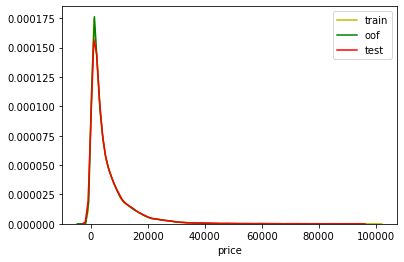

In [64]:
sns.distplot(labels, label='train', color='y', hist=False)
sns.distplot(oof, label='oof', color='g', hist=False)
sns.distplot(sub['price'], label='test', color='r', hist=False)

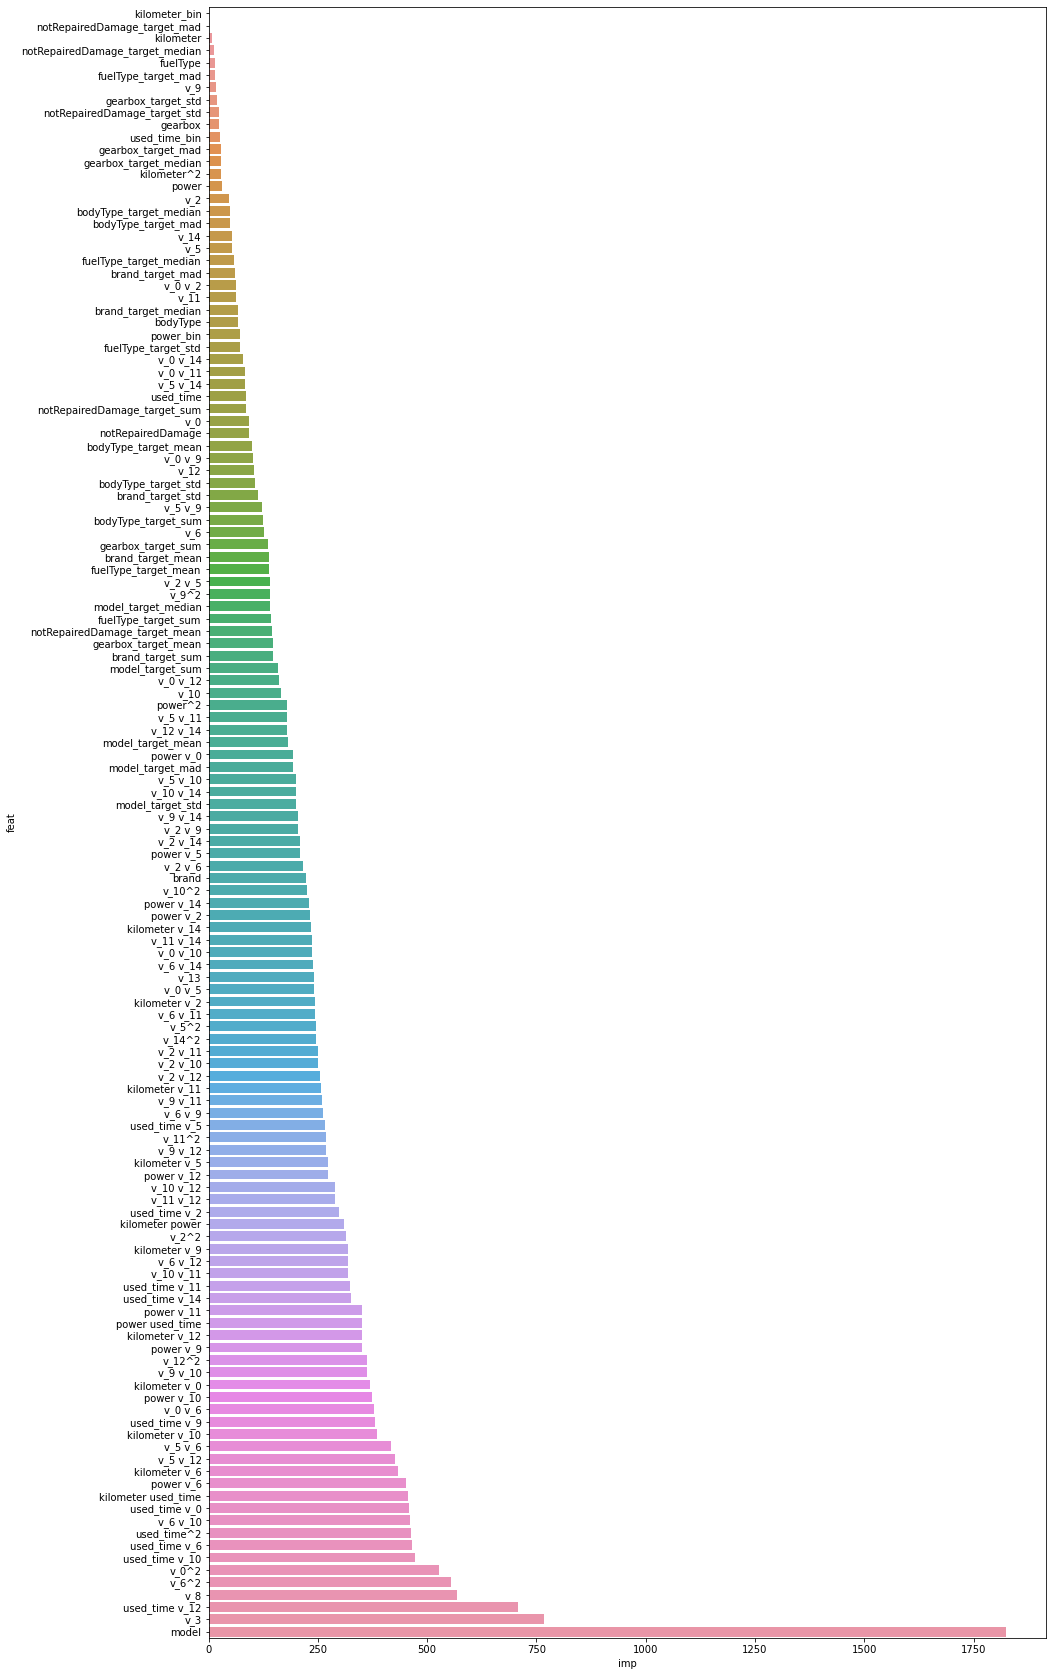

In [65]:
plt.figure(figsize=(15, 30))
feat_imp_df = feat_imp_df.sort_values('imp').reset_index(drop=True)
f = sns.barplot(x='imp', y='feat', data=feat_imp_df)

In [82]:
a = feat_imp_df.sort_values('imp',ascending=False)

In [83]:
a

,feat,imp
131,model,1823.4
130,v_3,766.4
129,used_time v_12,708.8
128,v_8,568.8
127,v_6^2,553.6
126,v_0^2,526.2
125,used_time v_10,473.0
124,used_time v_6,465.4
123,used_time^2,464.0
122,v_6 v_10,460.8


In [84]:
a['imp'] = a['imp']/(a['imp'].sum())

In [94]:
a['imp']

131    0.060829
130    0.025567
129    0.023646
128    0.018975
127    0.018468
126    0.017554
125    0.015779
124    0.015526
123    0.015479
122    0.015372
121    0.015279
120    0.015239
119    0.015085
118    0.014458
117    0.014198
116    0.013911
115    0.012817
114    0.012737
113    0.012657
112    0.012443
111    0.012290
110    0.012103
109    0.012070
108    0.011723
107    0.011709
106    0.011703
105    0.011696
104    0.010835
103    0.010769
102    0.010675
101    0.010642
100    0.010629
99     0.010488
98     0.010368
97     0.009928
96     0.009654
95     0.009621
94     0.009134
93     0.009081
92     0.008961
91     0.008934
90     0.008874
89     0.008714
88     0.008640
87     0.008614
86     0.008527
85     0.008327
84     0.008313
83     0.008207
82     0.008167
81     0.008120
80     0.008106
79     0.008066
78     0.008053
77     0.007946
76     0.007926
75     0.007920
74     0.007786
73     0.007766
72     0.007673
71     0.007533
70     0.007446
69     0

In [102]:
a['imp'][131]

0.06082866293034428

In [107]:
b = []
c = 0
for i in range(132):
    c = (a['imp'][131 - i] + c)
    b.append(c)        

In [108]:
b

[0.06082866293034428,
 0.0863957832933013,
 0.11004136642647451,
 0.1290165465705898,
 0.14748465439017883,
 0.1650386976247665,
 0.18081798772351215,
 0.19634374165999466,
 0.2118227915665866,
 0.22719508940485722,
 0.24247397918334668,
 0.25771283693621566,
 0.2727982385908727,
 0.287256471844142,
 0.30145449693087806,
 0.3153656258340006,
 0.3281825460368295,
 0.34091940218841743,
 0.35357619428876436,
 0.36601948225246866,
 0.37830931411796104,
 0.3904123298638911,
 0.4024819855884708,
 0.41420469709100616,
 0.42591406458500136,
 0.4376167600747265,
 0.4493127835601815,
 0.46014811849479587,
 0.4709167333867094,
 0.4815919402188418,
 0.4922337870296237,
 0.5028622898318655,
 0.5133506805444356,
 0.5237189751801441,
 0.5336469175340272,
 0.5433013077128369,
 0.5529223378702962,
 0.5620563117160394,
 0.571136909527622,
 0.580097411262343,
 0.5890312249799838,
 0.5979049906591939,
 0.6066186282359219,
 0.6152588737656791,
 0.6238724312783559,
 0.6323992527355217,
 0.6407259140645849,


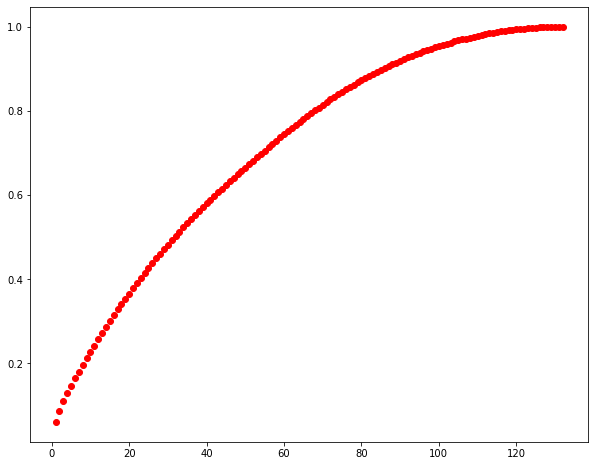

In [115]:
plt.figure(figsize=(10,8))
plt.plot(range(1,133,1),b,'ro')

### Step 4:模型训练与预测

In [116]:
#### 1) 利用xgb进行五折交叉验证查看模型的参数效果

In [117]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [118]:
X_data = train_df
Y_data = train['price']
X_test = test_df

In [120]:
import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
## xgb-Model
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    
    train_x=X_data.iloc[train_ind].values
    train_y=Y_data.iloc[train_ind]
    val_x=X_data.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb=xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 480.88324946595145
Val mae 575.548543148025


In [121]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 150)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm

In [122]:
## Split data with val
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)

In [123]:
print('Train lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

print('Predict lgb...')
model_lgb_pre = build_model_lgb(X_data,Y_data)
subA_lgb = model_lgb_pre.predict(X_test)
print('Sta of Predict lgb:')
Sta_inf(subA_lgb)

Train lgb...
MAE of val with lgb: 551.7330157855135
Predict lgb...
Sta of Predict lgb:
_min -581.1469613580567
_max: 93469.7739549967
_mean 5947.164752623731
_ptp 94050.92091635475
_std 7483.135410754349
_var 55997315.575685665


In [124]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

print('Predict xgb...')
model_xgb_pre = build_model_xgb(X_data,Y_data)
subA_xgb = model_xgb_pre.predict(X_test)
print('Sta of Predict xgb:')
Sta_inf(subA_xgb)

Train xgb...
MAE of val with xgb: 568.6457123867038
Predict xgb...
Sta of Predict xgb:
_min -599.79193
_max: 93929.55
_mean 5943.3228
_ptp 94529.336
_std 7441.281
_var 55372656.0


In [125]:
## 这里我们采取了简单的加权融合的方式
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_Weighted[val_Weighted<0]=10 # 由于我们发现预测的最小值有负数，而真实情况下，price为负是不存在的，由此我们进行对应的后修正
print('MAE of val with Weighted ensemble:',mean_absolute_error(y_val,val_Weighted))

MAE of val with Weighted ensemble: 543.4118541924005


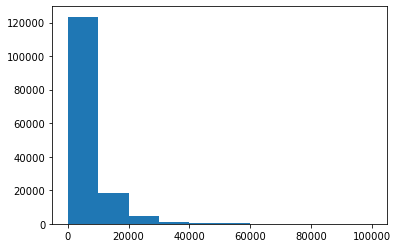

In [126]:
sub_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*subA_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*subA_xgb

## 查看预测值的统计进行
plt.hist(Y_data)
plt.show()
plt.close()

In [127]:
sub_Weighted

array([39193.48451739,   184.44553197,  6094.53074524, ...,
        7793.95549004, 10478.55240571,  3315.75068128])

In [130]:
sub = pd.DataFrame()
sub['SaleID'] = test.SaleID
sub['price'] = sub_Weighted
sub.to_csv('sub1.csv',index=False)

In [5]:

from sklearn.model_selection import KFold
from tqdm import tqdm

train_df = df[~df['price'].isnull()].reset_index(drop=True)
test_df = df[df['price'].isnull()].reset_index(drop=True)


### target encoding目标编码，回归场景相对来说做目标编码的选择更多，不仅可以做均值编码，还可以做标准差编码、中位数编码等
enc_cols = []
stats_default_dict = {
    'max': train_df['price'].max(),
    'min': train_df['price'].min(),
    'median': train_df['price'].median(),
    'mean': train_df['price'].mean(),
    'sum': train_df['price'].sum(),
    'std': train_df['price'].std(),
    'skew': train_df['price'].skew(),
    'kurt': train_df['price'].kurt(),
    'mad': train_df['price'].mad()
}
### 暂且选择这三种编码
enc_stats = ['mean', 'std', 'mad']
skf = KFold(n_splits=5, shuffle=True, random_state=2020)
for f in tqdm(['model', 'brand', 'city']):
    enc_dict = {}
    for stat in enc_stats:
        enc_dict['{}_target_{}'.format(f, stat)] = stat
        train_df['{}_target_{}'.format(f, stat)] = 0
        test_df['{}_target_{}'.format(f, stat)] = 0
        enc_cols.append('{}_target_{}'.format(f, stat))
    # skf.split()返回索引的迭代器        
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['price'])):
        trn_x, val_x = train_df.iloc[trn_idx].reset_index(drop=True), train_df.iloc[val_idx].reset_index(drop=True)
        enc_df = trn_x.groupby(f, as_index=False)['price'].agg(enc_dict)
        val_x = val_x[[f]].merge(enc_df, on=f, how='left')
        test_x = test_df[[f]].merge(enc_df, on=f, how='left')
        for stat in enc_stats:
            val_x['{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            test_x['{}_target_{}'.format(f, stat)] = test_x['{}_target_{}'.format(f, stat)].fillna(stats_default_dict[stat])
            train_df.loc[val_idx, '{}_target_{}'.format(f, stat)] = val_x['{}_target_{}'.format(f, stat)].values
            test_df['{}_target_{}'.format(f, stat)] += test_x['{}_target_{}'.format(f, stat)].values / skf.n_splits


cols = enc_cols
sub = test_df[['SaleID']].copy()
test_df = test_df[cols]
labels = train_df['price'].values
train_df = train_df[cols]
print(train_df.shape)
train_df.head()

100%|████████████████████████████████████████████| 3/3 [00:08<00:00,  2.92s/it]

(148990, 9)


,model_target_mean,model_target_std,model_target_mad,brand_target_mean,brand_target_std,brand_target_mad,city_target_mean,city_target_std,city_target_mad
0,2744.173772,2995.637300,2262.766936,3595.692952,4589.135585,3157.549632,6255.913809,7626.986145,5248.273668
1,6815.316643,6331.239592,4766.764000,9291.300882,9395.993849,6926.110609,5711.435860,6822.766881,4708.081471
2,10969.935705,5896.813694,4828.830573,9869.936986,5579.138743,4475.424272,5526.676043,7024.206610,4665.914518
3,13164.290625,12360.691602,8921.726582,8465.975711,8935.459710,6416.840150,5678.914369,6804.147019,4722.659408
4,1577.877069,1536.621415,1257.870429,3282.921409,3296.412317,2288.931950,5662.243208,6439.989370,4681.319976


In [7]:
train_df.columns

Index(['model_target_mean', 'model_target_std', 'model_target_mad',
       'brand_target_mean', 'brand_target_std', 'brand_target_mad',
       'city_target_mean', 'city_target_std', 'city_target_mad'],
      dtype='object')

In [17]:
test_df.columns

Index(['model_target_mean', 'model_target_std', 'model_target_mad',
       'brand_target_mean', 'brand_target_std', 'brand_target_mad',
       'city_target_mean', 'city_target_std', 'city_target_mad'],
      dtype='object')